# <a>Projeto 4 - Aprendizado Não Supervisionado (PCA)</a>

*Let's Data - Jornada Cientista da Dados*

## <a> Motivação </a>

PCA! Uma ferramenta muito útil na vida real e bastante subutilizada, a análise de componentes principais tem muitas aplicações práticas que podem ser utilizadas em praticamente qualquer empresa/organização.

Questionários com dezenas ou até centenas de respostas são difíceis de analisar para agrupar os segmentos semelhantes. PCA é usado para: reduzir a dimensionalidade das respostas a tais questionários melhorando muito a compreensão e aplicação da análise de aglomerados (clusterização).

Esse tipo de problema claramente é aplicável em diversos segmentos da economia!

## <a> Objeto de Estudo </a>

foi contratado(a) como cientista de dados na Let's Ride, a próxima concorrente da Tesla Motors!!! Estamos lançando um novo conceito de carro, uma espécie de microvan (maior que SUV, mas menor que minivan), e queremos conhecer o melhor público para iniciar nossas campanhas de marketing.

O principal método para detectar tais tendências é a pesquisa primária do consumidor, geralmente começando com grupos focais direcionados e prosseguindo para pesquisas de média e, eventualmente, de grande escala. Essas pesquisas servem a pelo menos dois propósitos:
- verificar os “desejos e necessidades” de um determinado grupo/nicho de consumidores
- junto com os dados demográficos, tentar avaliar o perfil de quem gostou do conceito de microvan da Let's Ride

As perguntas de negócio que queremos responder são:
- Qual é o segmento alvo para este carro?
- Quais são os desejos e necessidades deste segmento?

Então, a Let's Ride realizou pesquisa de vários grupos focais entre potenciais compradores desses carros. Ainda, a equipe de marketing examinou uma longa lista de potenciais atributos que poderiam ser importantes para compradores de microvans, bem como declarações de estilo de vida, validadas por suas extensas pesquisas anteriores na indústria automobilística. Com base em notas detalhadas feitas durante a fase de grupo focal, estabeleceu-se em um conjunto de 30 atributos que pareciam capturar a natureza da discussão, bem como variáveis demográficas importantes. O objetivo é usar esses atributos para capturar as dimensões-chave que caracterizam potenciais compradores e identificar os segmentos que a Let's Ride poderia criar para suas campanhas. Por fim, foi apresentado um projeto do carro (microvan) para que os potenciais consumidores dessem uma nota de 1 a 9 se gostaram ou não.

O problema é que, se fizermos uma análise de aglomerados com 30 features, o resultado não será muito inteligível e ficaria difícil depreender os perfis dos clientes. Podemos reduzir a dimensionalidade das features para agrupar as que possuem variância similar (PCA) e então avaliar qual foi o resultado dessa redução em termos de interesses dos clientes. Para avaliar a homegeneidade dos grupos, somente com clusterização, mas já com PCA conseguimos ter a junção de features com variância semelhante, o que, para respostas de questionários, serve como um agrupamento de perfis de respostas.

Assim como nos outros projetos, bancos, telefônicas, varejo, qualquer empresa que presta algum tipo de serviços e possui informações sobre seus clientes pode se beneficiar de análise de questionários de clientes e redução em componentes principais conforme iremos construir nesse projeto.

ps: esse estudo de caso real (Grosse Pointe Associates and The “Microvan”) está disponível no excelente livro "Modern Marketing Research: Concepts, Methods, and Cases" ISBN 1133188966

In [1]:
#!pip install scikit-learn pandas seaborn

In [2]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Ler os dados da microvan.
df_microvan = pd.read_csv('/content/sample_data/microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [5]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4



Além da variável **mvliking** que apresenta o quanto o(a) potencial cliente gostou do conceito da microvan, as outras colunas relacionadas ao questionário são:

- kidtrans: Precisamos de um carro que ajude a transportar nossos filhos os seus amigos.
- miniboxy: As minivans atuais são simplesmente muito quadradas e grandes.
- lthrbetr: Os assentos de couro são muito melhores que os de tecido.
- secbiggr: Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão.
- safeimpt: A segurança do automóvel é muito importante para mim.
- buyhghnd: Nós tendemos a comprar carros mais sofisticados.
- pricqual: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente.
- prmsound: Um sistema de som e entretenimento premium ajuda em longas viagens de carro.
- perfimpt: O desempenho é muito importante em um carro.
- tkvacatn: Tentamos tirar o máximo de férias possível.
- noparkrm: Nossa residência atual não tem muito espaço de estacionamento.
- homlrgst: Nossa casa está entre as maiores do bairro.
- envrminr: O impacto ambiental dos automóveis é relativamente pequeno.
- needbetw: Precisa haver algo entre um sedan e uma minivan.
- suvcmpct: Gosto mais de SUVs do que de minivans, pois são mais compactos.
- next2str: Meu próximo carro será um de dois lugares.
- carefmny: Temos cuidado com o dinheiro.
- shdcarpl: Acho que todo mundo deveria pegar carona ou usar transporte público.
- imprtapp: A maioria dos nossos aparelhos são importados.
- lk4whldr: A tração nas quatro rodas é uma opção muito atraente.
- kidsbulk: Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles.
- wntguzlr: Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”.
- nordtrps: Não fazemos viagens com a família
- stylclth: Nós tendemos a comprar roupas elegantes para a família.
- strngwrn: A proteção da garantia precisa ser forte em um carro novo.
- passnimp: A paixão pelo trabalho é mais importante do que o pagamento.
- twoincom: Nossa família acharia difícil subsistir com apenas uma renda.
- nohummer: Não estou interessado em possuir um veículo como um Hummer.
- aftrschl: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias.
- accesfun: Os acessórios realmente tornam o carro mais divertido de dirigir.

Já os dados demográficos dos clientes são:

- age: Idade do entrevistado em anos
- income: Renda familiar anual em milhares de dólares
- miles: Valor anual total conduzido por membros da família em milhares de milhas
- numkids: Número de crianças (0-18 anos) que residem no domicílio
- female: Se o entrevistado é ou não uma mulher
- educ: Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)
- recycle: Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)

Para não ser necessário decorar tudo isso criei um dicionário:

In [6]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'


In [7]:
dicionario_dados['age'], dicionario_dados['homlrgst']

('Idade do entrevistado em anos', 'Nossa casa está entre as maiores do bairro')

In [8]:
# Avaliando linhas e colunas
df_microvan.shape

(400, 38)

In [9]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

In [10]:
# Avaliando os tipos
df_microvan.dtypes

,0
mvliking,int64
kidtrans,int64
miniboxy,int64
lthrbetr,int64
secbiggr,int64
safeimpt,int64
buyhghnd,int64
pricqual,int64
prmsound,int64
perfimpt,int64


## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando.

In [11]:
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## <a> Redução de Dimensionalidade com PCA! </a>

Vou agora reduzir a dimensionalidade utilizando análise de componentes principais (PCA).

In [12]:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']
df_microvan.drop(colunas_demograficas, axis=1).head()

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4
2,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5
3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6
4,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3
5,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5


In [13]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Remover as colunas demograficas para deixar somente o questionário (retirar também a variável mvliking)
# O intuito é somente deixar as variáveis do questionário
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

# Testando o número de compontentes e calculando a variância explicada de cada um
for numero_componentes in range(1, 10):
    # Classe PCA passando o número de componentes e o dataframe que vai ser reduzido
    pca = PCA(n_components=numero_componentes, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
    print(f'{numero_componentes} componentes com variância explicada total de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')



1 componentes com variância explicada total de 0.2769670987967245: [0.2769671]
2 componentes com variância explicada total de 0.4445767750017478: [0.2769671  0.16760968]
3 componentes com variância explicada total de 0.5459459552274872: [0.2769671  0.16760968 0.10136918]
4 componentes com variância explicada total de 0.6342464490894244: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância explicada total de 0.6949209280291696: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância explicada total de 0.7163695796236542: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância explicada total de 0.7356422840632016: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância explicada total de 0.7538737884378807: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância explicada total de 0.77

In [14]:
# Escolhemos o número de compontentes em 5 pela explicabilidade da variância
pca = PCA(n_components = 5, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))

f'Ou seja, com cinco componentes temos {sum(pca.explained_variance_ratio_) * 100} da variância explicada!'

'Ou seja, com cinco componentes temos 69.49209280291696 da variância explicada!'

In [15]:
df_microvan.shape

(400, 38)

## <a>Análise dos Componentes</a>

Cada componente é criado como "parte" das variáveis originais. Ou seja, as variáveis originais compõe os componentes principais (lembra da projeção: o componente é a projeção dessas variáveis). Mas como saber o impacto de cada variável na projeção final? Existe um atributo no objeto PCA que mostra esses valores pra gente.

In [16]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [-1.09807865e-03,  3.64988114e-01, -8.12541567e-02,
         3.38909225e-01,  2.18792400e-04,  8.27943891e-02,
        -7.97252373e-02, -6.19192696e-03, -1.47139293e-02,
        -1.17792436e-02,  3.61515356e-01, -2.99948345e-01,
        -1.51018703e-02,  3.46323846e-01,  3.61913246e-01,
        -3.38353633e-01, -6.73537198e-02, -1.41603682e-02,
        -7.29399128e-03, -7.47233603e-03,  5.49026164e-

 Irei mostrar que essa sopa de números é, na verdade, a composição de cada componente com relação às variáveis originais!! Vou também mostrar os pesos de cada feature na composição dos componentes de forma gráfica.

In [17]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range(5):
    df_composicao_componentes.loc[i] = pca.components_[i]

df_composicao_componentes

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,-0.00,0.36,-0.08,0.34,0.00,0.08,-0.08,-0.01,-0.01,-0.01,0.36,-0.30,-0.02,0.35,0.36,-0.34,-0.07,-0.01,-0.01,-0.01,0.01,0.01,-0.04,0.11,-0.13,-0.01,0.06,0.32,-0.05,-0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,-0.31,0.07,-0.03,-0.04,0.44,0.06,0.02,0.01,-0.42,-0.04,0.00,0.00,-0.11,0.05,-0.05,-0.07,-0.01,0.13,0.02,0.42,-0.25,-0.05,0.26,-0.03,0.34,0.11,0.08,0.02,-0.18,-0.07
4,0.13,-0.03,-0.08,0.07,0.03,-0.30,-0.42,-0.08,-0.08,0.05,-0.11,0.07,-0.41,-0.02,0.04,-0.17,0.09,0.42,0.07,0.03,0.12,-0.29,-0.16,0.04,-0.03,0.03,-0.39,-0.03,0.02,-0.01


In [18]:
dicionario_dados['kidtrans']

'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'

In [19]:
# Para o componente 1, vou pegar o maior influência positiva e maior influência negativa
df_composicao_componentes.loc[0].max()

0.29192820787561397

In [20]:
df_composicao_componentes.loc[0].argmax()

16

In [21]:
df_composicao_componentes.columns[df_composicao_componentes.loc[0].argmax()]

'carefmny'

In [22]:
dicionario_dados['carefmny']

'Temos cuidado com o dinheiro'

In [23]:
# Agora que sei como fazer, vou calcular para cada componente

for i in range(5):
    coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
    coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]

    print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}"\n\n')

Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível"


Componente 2 impacto positivo: "As minivans atuais são simplesmente muito quadradas e grandes" e impacto negativo: "Meu próximo carro será um de dois lugares"


Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família"


Componente 4 impacto positivo: "A segurança do automóvel é muito importante para mim" e impacto negativo: "O desempenho é muito importante em um carro"


Componente 5 impacto positivo: "Acho que todo mundo deveria pegar carona ou usar transporte público" e impacto negativo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente"




#### <a>Analisando graficamente os pesos de cada variável nos componentes principais</a>

In [24]:
dicionario_dados['suvcmpct']

'Gosto mais de SUVs do que de minivans, pois são mais compactos'

<Axes: >

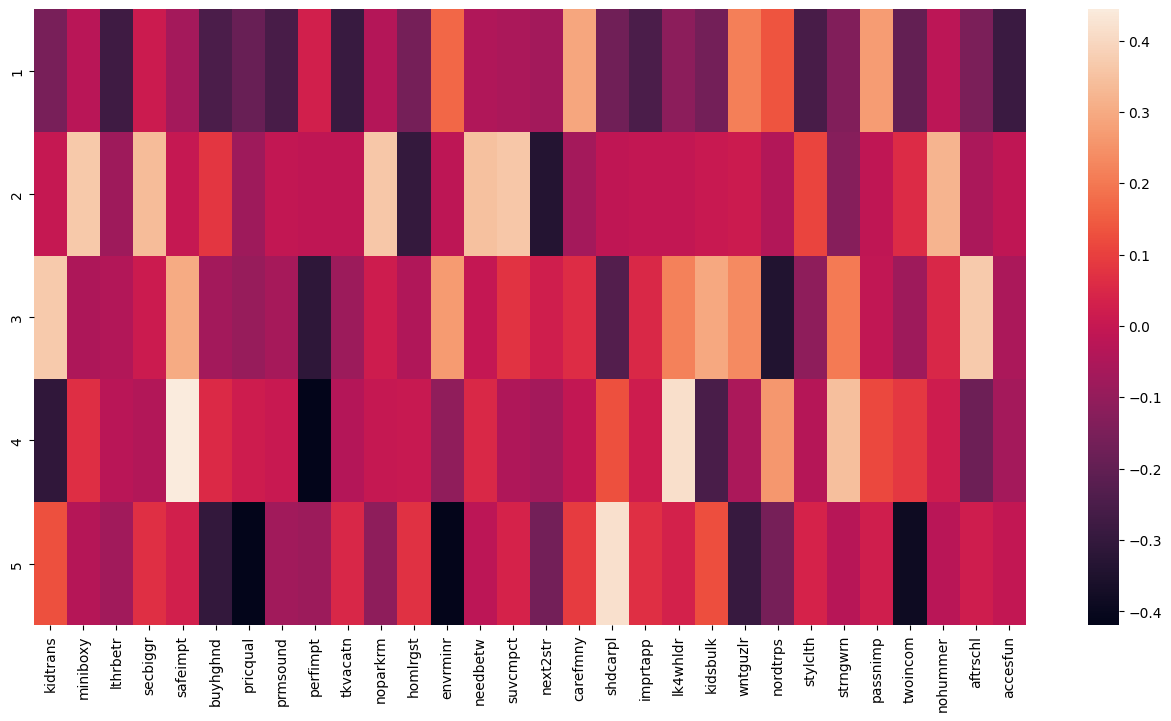

In [25]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(data=df_composicao_componentes, yticklabels=df_composicao_componentes.index+1)

Para facilitar o entendimento posterior e termos um nome mais mnemônico que somente componente 1, 2; podemos criar "nomes" para os componentes de acordo com suas características. Isso vai ser útil quando fizermos análise de aglomerados mais à frente!

* Componente 1: **Temos cuidado com o dinheiro**
-Componente 2: **Gosto mais de SUVs do que de minivans**
-Componente 3: **Precisamos de um carro que ajude a transportar muitas pessoas**
-Componente 4: **A segurança do automóvel é muito importante para mim**
-Componente 5: **Acho que todo mundo deveria pegar carona ou usar transporte público**

Apesar dos nomes e brincadeiras, de fato é importante reconhecer características dos componentes para embasar as campanhas de marketing. Entender os componentes faz com que tenhamos noção de quais variáveis tem variabilidade semelhante, o que, em questionários, realmente aproxima aquelas variáveis que são mais similares.

Por fim, vou transformar o dataframe original com os componentes que criei

In [26]:
componentes_principais_microvan = pca.transform(df_microvan.drop(colunas_demograficas, axis=1))
componentes_principais_microvan

array([[ 4.95739724,  0.630778  ,  0.25397408, -4.53413096, -0.4787577 ],
       [-0.42529226,  4.57730748, -2.68257259,  2.62292284,  0.50422577],
       [-4.20223653, -5.99835902,  2.46455968, -1.54782301,  2.41202492],
       ...,
       [-6.4115679 ,  4.47822563, -6.6555251 ,  0.29161379,  1.62472682],
       [-3.57270499,  5.5292335 ,  0.25267482, -2.61167859,  1.04362801],
       [ 4.05034892, -2.45977589,  3.75878157,  0.49039215, -0.74268315]])

In [27]:
# Agora que tem os componentes, vou apensar as colunas nos clientes para termos os dados completos
# Primeiro, transformando o array em dataframe para incluir os nomes certos dos componentes
nomes_componentes = ['Cuidado_dinheiro', 'SUVs', 'Espaço_muitas_pessoas', 'Segurança_automovel', 'Transporte_publico']

df_componentes_principais_microvan = pd.DataFrame(componentes_principais_microvan, columns = nomes_componentes, index=df_microvan.index)
df_componentes_principais_microvan.head()

,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico
subjnumb,,,,,
1,4.96,0.63,0.25,-4.53,-0.48
2,-0.43,4.58,-2.68,2.62,0.50
3,-4.20,-6.00,2.46,-1.55,2.41
4,4.89,0.93,-0.76,3.58,-3.52
5,0.12,-5.55,-1.02,-0.07,0.84


In [28]:
# Finalmente, apensar aos dados originais (sem os questionários, já os trocamos por componentes principais)
colunas_demograficas

df_completo = pd.concat([df_microvan.loc[:, colunas_demograficas], df_componentes_principais_microvan], axis=1)
df_completo.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84


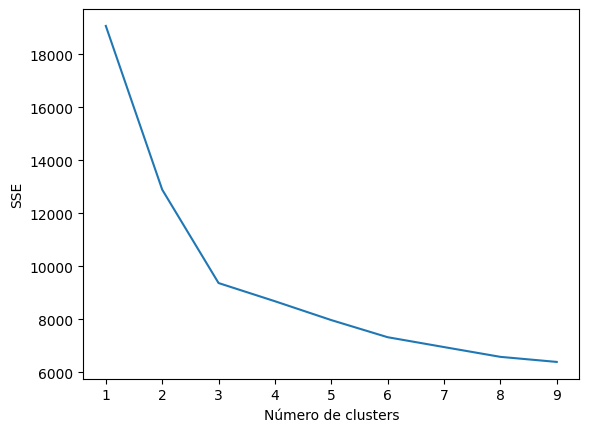

In [32]:
# Agora que tem nosso dataframe completo, vamos criar os clusters
from sklearn.cluster import KMeans

# Vou utilizar a métrica SSE (Error Sum of Squares) que
# calcula o quadrado da distância de cada ponto ao seu centróide
# e soma tudo! Ou seja, quanto mais "espalhado" os clusters estiverem, maior
# o erro (clusters juntinhos é melhor com SSE baixo)
sse = {}

# Vou utilizar o gráfico de cotovelo utilizando a métrica SSE variando de 1 a 9 clusters
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])

    # Inertia: Soma das distâncias entre as observações
    # e o centro do seu cluster
    sse[num_clusters] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])

# Incluindo a informação de qual cluster cada observação pertence
df_completo["clusters"] = kmeans.labels_
df_completo.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48,0
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50,2
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41,1
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52,0
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84,1


In [34]:
kmeans.labels_

array([0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0,
       0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0,
       0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2,

In [35]:
# Onde será que ficaram os centróides?
kmeans.cluster_centers_

array([[ 4.82314353,  0.17359036,  0.26109089,  0.08413115,  0.03966391],
       [-2.91459823, -3.66666699, -0.36032683, -0.16329513, -0.14071421],
       [-3.49014866,  3.97677834,  0.04436347,  0.06864481,  0.10576402]])

In [36]:
df_centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=nomes_componentes)
df_centroides

,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico
0,4.82,0.17,0.26,0.08,0.04
1,-2.91,-3.67,-0.36,-0.16,-0.14
2,-3.49,3.98,0.04,0.07,0.11


In [37]:
df_cluster0 = df_completo.loc[df_completo['clusters'] == 0]
df_cluster0.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,0.63,0.25,-4.53,-0.48,0
4,32,42,12,0,0,3,2,3,4.89,0.93,-0.76,3.58,-3.52,0
8,29,39,16,1,0,2,2,4,4.29,1.27,2.10,2.66,-0.53,0
10,26,26,11,0,0,2,3,3,8.11,-1.87,-1.86,1.12,0.59,0
11,31,20,12,0,1,3,3,1,5.16,2.38,2.59,3.28,-0.27,0


In [38]:
df_cluster1 = df_completo.loc[df_completo['clusters'] == 1]
df_cluster1.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
subjnumb,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,-6.00,2.46,-1.55,2.41,1
5,40,75,17,1,1,3,4,1,0.12,-5.55,-1.02,-0.07,0.84,1
6,43,94,16,0,0,3,5,2,-3.41,-8.46,-3.38,1.64,1.34,1
9,38,129,20,1,0,3,2,5,-3.82,-4.41,-0.15,-1.17,-1.07,1
12,43,136,17,0,0,3,1,3,-2.17,-4.27,0.15,-1.24,-2.22,1


In [39]:
df_cluster2 = df_completo.loc[df_completo['clusters'] == 2]
df_cluster2.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
subjnumb,,,,,,,,,,,,,,
2,36,79,16,1,0,3,4,6,-0.43,4.58,-2.68,2.62,0.50,2
7,47,38,26,2,1,4,3,8,-3.95,4.49,2.79,0.14,0.11,2
15,52,119,28,3,1,3,3,6,-6.21,5.45,1.31,0.02,0.12,2
16,39,28,29,2,1,4,3,6,-3.66,4.64,4.12,2.77,2.56,2
17,43,113,17,0,0,4,4,9,-4.10,4.96,-5.54,2.71,-2.03,2


In [40]:
df_completo['clusters'].value_counts()

,count
clusters,
0,159
1,129
2,112


In [41]:
df_cluster0.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,0.17,0.26,0.08,0.04,0.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-4.33,-5.78,-5.90,-5.45,0.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.06,-1.47,-1.45,-1.51,0.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,0.32,0.27,0.22,0.07,0.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.24,2.05,1.79,1.50,0.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,5.24,6.87,5.29,5.83,0.00


In [42]:
df_cluster1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,46.05,103.67,18.48,1.22,0.56,3.26,3.05,4.43,-2.91,-3.67,-0.36,-0.16,-0.14,1.00
std,5.97,43.27,3.52,0.99,0.50,0.66,1.20,2.55,1.85,1.64,2.63,2.41,2.01,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,-8.46,-6.20,-7.34,-6.33,1.00
25%,42.00,73.00,16.00,1.00,0.00,3.00,2.00,2.00,-4.20,-4.72,-2.32,-1.55,-1.29,1.00
50%,46.00,96.00,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,-3.65,-0.15,-0.33,0.03,1.00
75%,51.00,126.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.72,-2.67,1.47,1.59,1.28,1.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,0.53,5.46,6.34,4.31,1.00


In [43]:
df_cluster2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico,clusters
count,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00,112.00
mean,44.38,83.12,22.41,1.99,0.60,3.36,3.11,6.64,-3.49,3.98,0.04,0.07,0.11,2.00
std,5.73,33.42,4.05,1.12,0.49,0.64,1.23,2.25,1.97,1.50,2.77,2.54,1.90,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,0.23,-6.66,-6.62,-5.26,2.00
25%,40.00,59.00,19.75,1.00,0.00,3.00,2.00,5.00,-4.78,2.97,-1.76,-1.34,-0.99,2.00
50%,44.00,78.50,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,4.02,0.05,0.03,0.15,2.00
75%,48.00,105.00,26.00,3.00,1.00,4.00,4.00,9.00,-2.10,5.19,2.12,1.69,1.45,2.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,7.18,7.07,7.18,4.86,2.00


### Vamos entender melhor os clusters

In [44]:
import plotly.express as px

fig = px.histogram(data_frame=df_cluster0, x='mvliking')
fig.show()

In [45]:
fig = px.histogram(data_frame=df_cluster1, x='mvliking', color_discrete_sequence=['indianred'])
fig.show()

In [46]:
fig = px.histogram(data_frame=df_cluster2, x='mvliking', nbins=10, color_discrete_sequence=['slategray'])
fig.show()

In [47]:
fig = px.box(data_frame=df_completo, x='clusters', y='mvliking', color='clusters')
fig.show()

In [48]:
# Análises demográficas
df_completo.columns

Index(['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle',
       'mvliking', 'Cuidado_dinheiro', 'SUVs', 'Espaço_muitas_pessoas',
       'Segurança_automovel', 'Transporte_publico', 'clusters'],
      dtype='object')

In [49]:
df_demografico = df_completo.iloc[:, :8]
df_demografico.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


<Axes: >

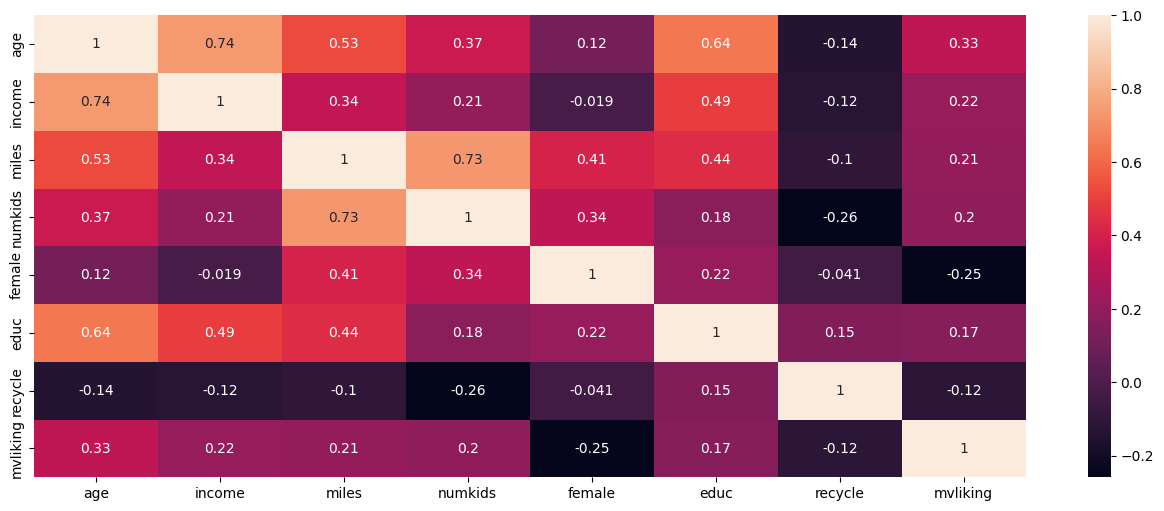

In [50]:
correlacoes_demograficas = df_demografico.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes_demograficas, annot=True)

<Axes: xlabel='age'>

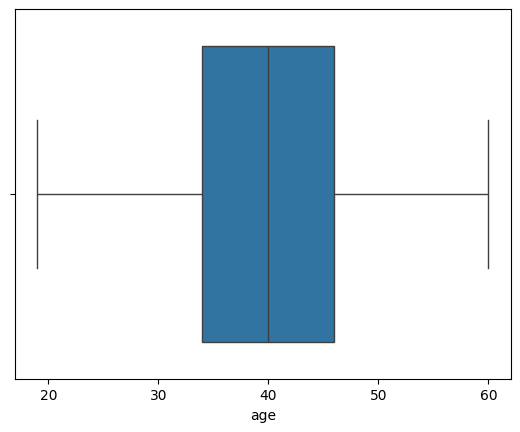

In [51]:
sns.boxplot(data=df_demografico, x='age')

In [52]:
df1 = df_completo.loc[(df_completo['age'] >=40) &
    (df_completo['female'] == False), :]

fig = px.box(data_frame=df1,
             x='clusters',
             y='mvliking', color='clusters')
fig.show()

In [54]:
100 * len(df_completo.loc[(df_completo['age'] >=40) & (df_completo['female'] == False)& (df_completo['clusters'] == 2), :]) / len(df_completo)

8.25

In [55]:
len(df_completo.loc[(df_completo['age'] >=40) & (df_completo['female'] == False)& (df_completo['clusters'] == 2), :])

33

In [56]:
df_centroides

,Cuidado_dinheiro,SUVs,Espaço_muitas_pessoas,Segurança_automovel,Transporte_publico
0,4.82,0.17,0.26,0.08,0.04
1,-2.91,-3.67,-0.36,-0.16,-0.14
2,-3.49,3.98,0.04,0.07,0.11


# <a>Conclusão</a>
Segmentei os clientes em clusters, utilizando PCA para reduzir a quantidade de perguntas do questionário. Descobrimos um cluster mais propenso a comprar nossa microvan!

As características do cluster 2 combinado com os componentes mais fortes desse aglomerado trazem uma noção muito melhor de quais os tipos de clientes serão foco de uma campanha de marketing. Essa informações combinadas com as demográficas, mostram que o foco deve ser mais ligado ao sexo masculino, com idade acima de 40/45 anos, que querem gastar muito com carro e gostam de muito espaço.